Sample phi angles: [[-163.66882]
 [-147.94543]
 [ -71.20062]
 [-114.53021]
 [-132.21278]
 [ -81.97289]
 [-159.30742]
 [-115.11779]
 [ -74.00962]
 [-139.7477 ]]
Sample psi angles: [[159.90703 ]
 [135.8583  ]
 [119.297966]
 [136.48933 ]
 [173.97354 ]
 [146.52187 ]
 [154.12885 ]
 [163.34065 ]
 [ 23.749771]
 [179.93477 ]]
Histogram shape: (50, 50)
Histogram sum: 7501.0


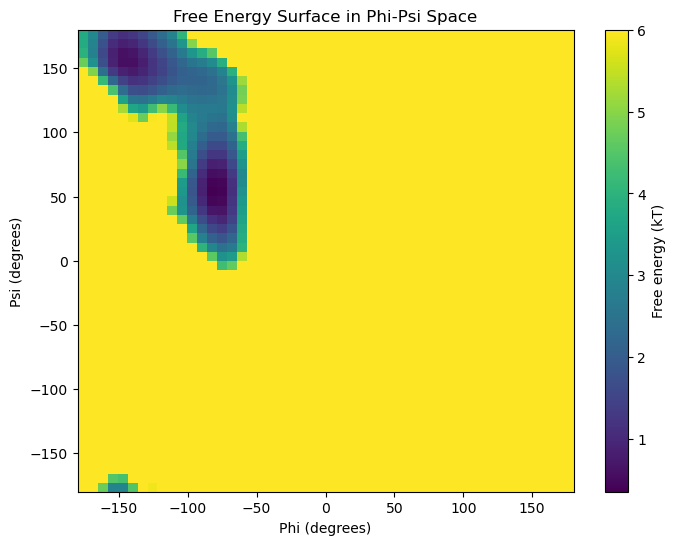

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# 加载轨迹文件 (.xtc 和 .gro)
traj = md.load('production_md.xtc', top='adp.gro')

# 计算 phi 和 psi 二面角
phi_indices, phis = md.compute_phi(traj)
psi_indices, psis = md.compute_psi(traj)

# 将 phi 和 psi 转换为度数
phis = np.rad2deg(phis)
psis = np.rad2deg(psis)

# 检查 phi 和 psi 的值是否合理
print("Sample phi angles:", phis[:10])
print("Sample psi angles:", psis[:10])

# 创建更细致的 2D 直方图（50x50 的网格）
n_bins = 50
hist, x_edges, y_edges = np.histogram2d(phis.flatten(), psis.flatten(), bins=n_bins, range=[[-180, 180], [-180, 180]])

# 检查直方图是否生成正确
print("Histogram shape:", hist.shape)
print("Histogram sum:", np.sum(hist))

# 计算自由能表面 F(phi, psi) = -log(histogram)
fes = -np.log(hist + 1e-8)  # 加小数避免 log(0)
fes -= np.min(fes)  # 将自由能表面归一化

# 平滑处理
fes_smooth = gaussian_filter(fes, sigma=1)

# 绘制自由能表面，限制最大自由能为 6 kT
plt.figure(figsize=(8, 6))
plt.imshow(fes_smooth.T, origin='lower', extent=(-180, 180, -180, 180), aspect='auto', cmap='viridis', vmax=6)
plt.colorbar(label='Free energy (kT)')
plt.xlabel('Phi (degrees)')
plt.ylabel('Psi (degrees)')
plt.title('Free Energy Surface in Phi-Psi Space')
plt.show()

